# CutMix 效果可視化

這個 notebook 用於觀察和分析 CutMix 數據增強的效果。

In [13]:
import os
import torch
import numpy as np
import matplotlib.pyplot as plt
from torch.utils.data import DataLoader
from utils.dataset_utils import PromptTrainDataset
from utils.image_io import save_image_tensor
import random
%matplotlib inline
# 設置隨機種子
def set_seed(seed):
    random.seed(seed)
    np.random.seed(seed)
    torch.manual_seed(seed)
    torch.cuda.manual_seed_all(seed)
    torch.backends.cudnn.deterministic = True
    torch.backends.cudnn.benchmark = False



In [14]:
# 設置數據集路徑
training_root_dir = "data/Train"  # 請根據實際路徑修改

# 創建數據集
dataset = PromptTrainDataset(
    training_root_dir,
    patch_size=256,
    use_cutmix=True,
    cutmix_prob=0.5
)

# 創建數據加載器
dataloader = DataLoader(
    dataset,
    batch_size=4,
    shuffle=True,
    num_workers=4,
    pin_memory=True
)

Total samples loaded: 3200


In [15]:
def analyze_cutmix_effects(dataloader, num_batches=100):
    cutmix_count = 0
    total_samples = 0
    shown = 0  # 記錄已經顯示幾組

    for i, batch in enumerate(dataloader):
        if i >= num_batches:
            break

        ([clean_name, de_id], degrad_patch, clean_patch) = batch
        total_samples += len(clean_name)

        for j in range(len(clean_name)):
            if torch.any(degrad_patch[j] != clean_patch[j]):
                cutmix_count += 1
                if shown < 4:
                    fig, axes = plt.subplots(1, 2, figsize=(8, 4))
                    
                    img1 = np.transpose(degrad_patch[j].cpu().numpy(), (1, 2, 0))
                    img2 = np.transpose(clean_patch[j].cpu().numpy(), (1, 2, 0))
                    
                    img1 = np.clip(img1, 0, 1)
                    img2 = np.clip(img2, 0, 1)

                    axes[0].imshow(img1)
                    axes[0].set_title(f'Degraded (CutMix) {clean_name[j]}')
                    axes[0].axis('off')

                    axes[1].imshow(img2)
                    axes[1].set_title(f'Clean {clean_name[j]}')
                    axes[1].axis('off')

                    plt.tight_layout()
                    plt.show()
                    plt.close(fig)

                    shown += 1

    print(f"Total samples analyzed: {total_samples}")
    print(f"Samples with CutMix: {cutmix_count}")
    print(f"CutMix percentage: {cutmix_count / total_samples * 100:.2f}%")

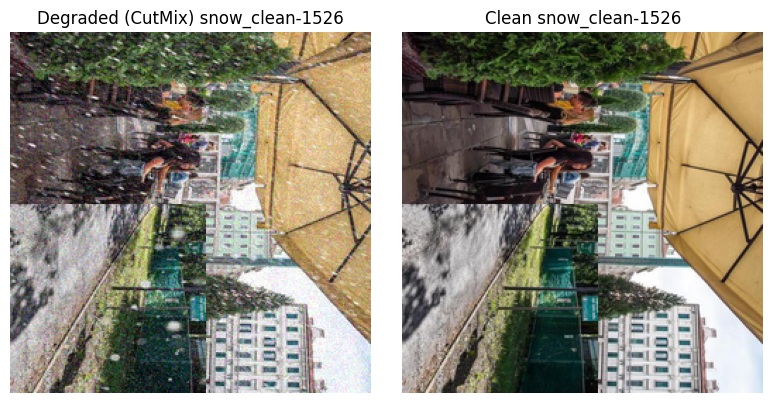

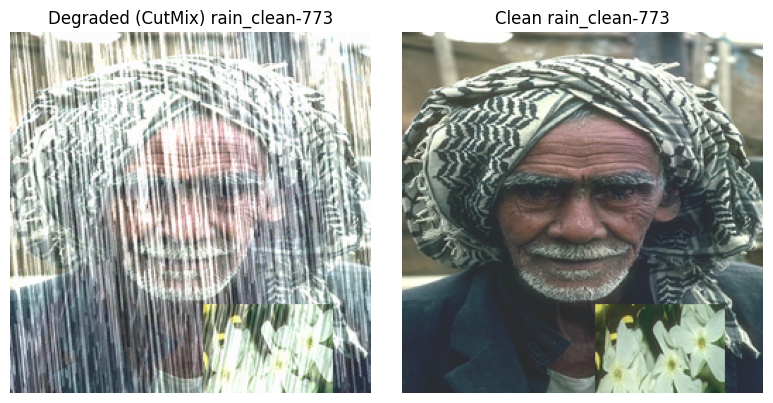

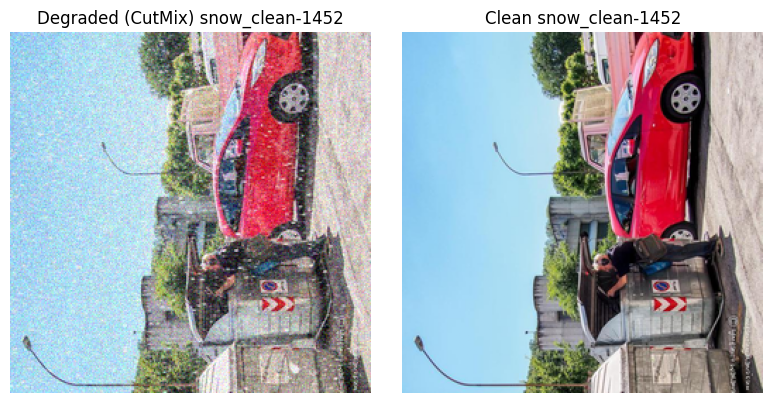

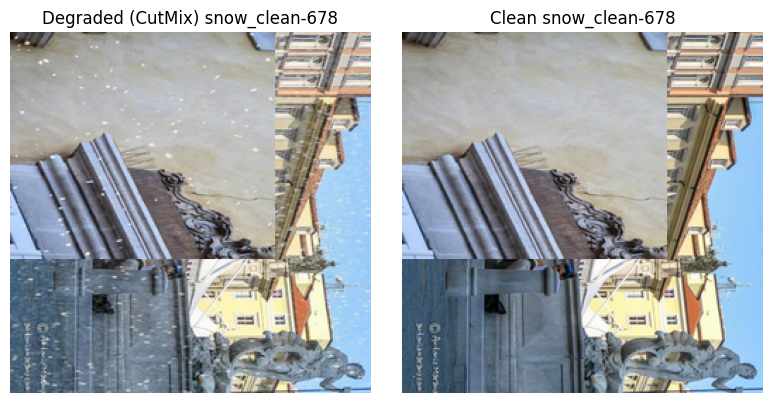

Total samples analyzed: 400
Samples with CutMix: 400
CutMix percentage: 100.00%


In [16]:
analyze_cutmix_effects(dataloader)